<H4>NAME : SHWETA ARVIND PATIL</H4>
<H4>PROJECT-TITLE :SALES-PREDICTION USING PYTHON</H4>
<H4>INTERNSHIP-PROGRAM : CODSOFT</H4>
<H4>DOMAIN-NAME : DATA-SCIENCE</H4>

In [1]:
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\john\Downloads\advertising.csv",encoding='latin-1')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
data.shape

(200, 4)

In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [19]:
data.fillna(data.median(), inplace=True)

In [21]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


data visualization

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'TV advertising spend disttribution')

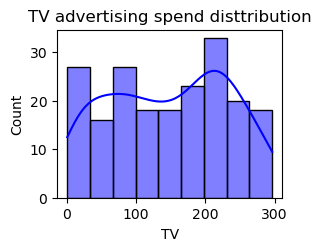

In [89]:
plt.subplot(2,2,1)
sns.histplot(data['TV'],kde=True,color='blue')
plt.title("TV advertising spend disttribution")

Text(0.5, 1.0, 'Radio advertising spend disttribution')

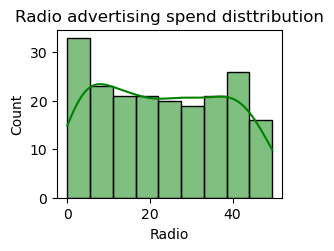

In [91]:
plt.subplot(2,2,2)
sns.histplot(data['Radio'],kde=True,color='green')
plt.title("Radio advertising spend disttribution")

Text(0.5, 1.0, 'Newspaper advertising spend disttribution')

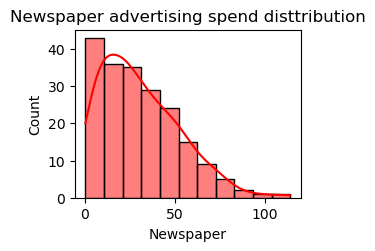

In [93]:
plt.subplot(2,2,3)
sns.histplot(data['Newspaper'],kde=True,color='red')
plt.title("Newspaper advertising spend disttribution")

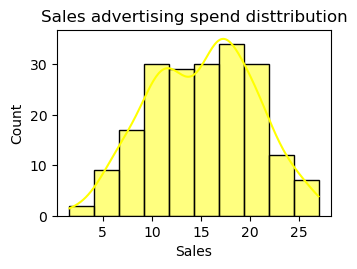

In [97]:
plt.subplot(2,2,4)
sns.histplot(data['Sales'],kde=True,color='yellow')
plt.title("Sales advertising spend disttribution")
plt.tight_layout()


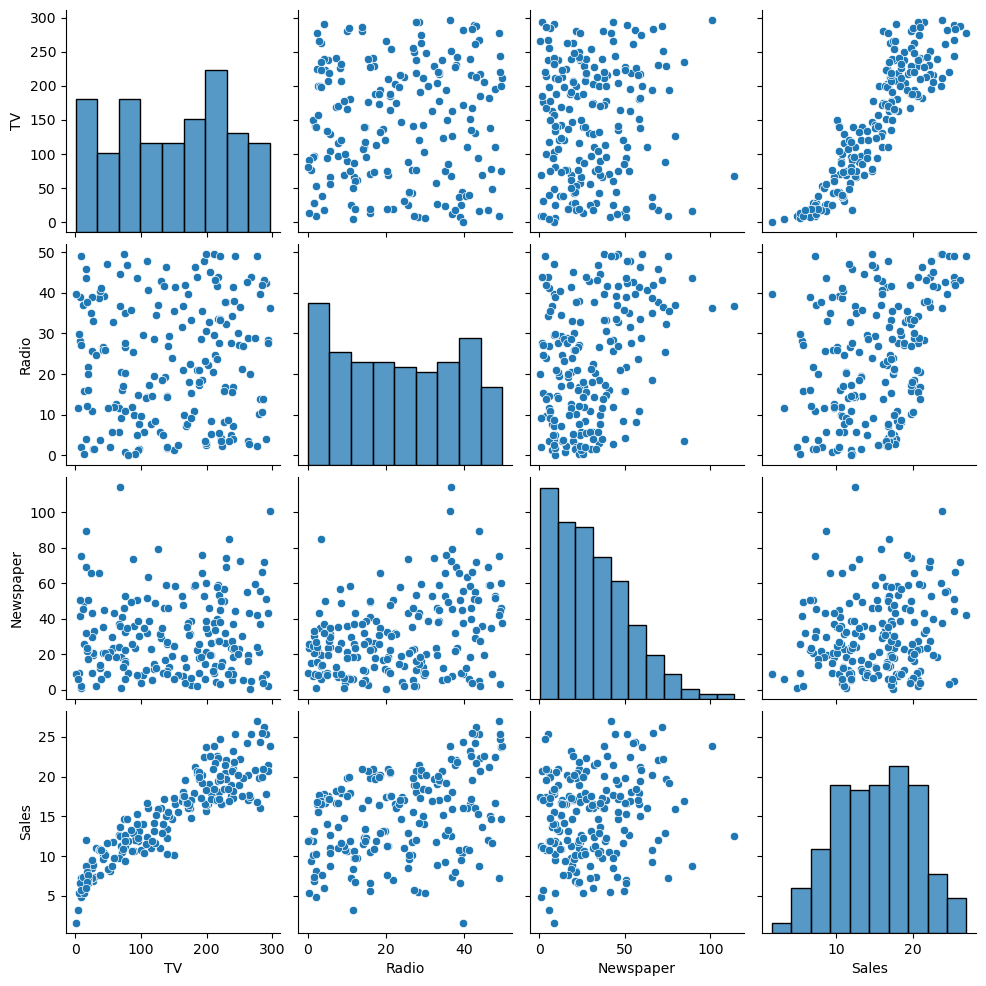

In [35]:
sns.pairplot(data)
plt.show()

correlation heatmap

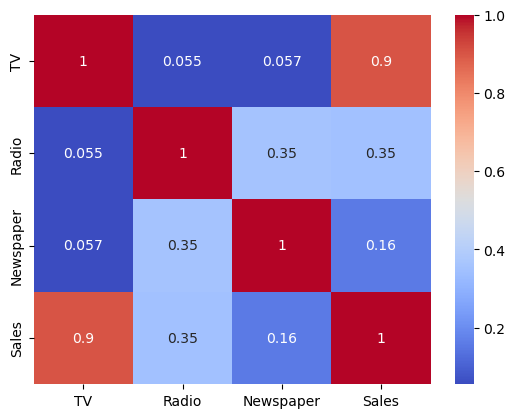

In [38]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.show()

spliting the data into training and test sets

In [41]:
from sklearn.model_selection import train_test_split

In [45]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(160, 3)

In [49]:
X_test.shape

(40, 3)

In [51]:
y_train.shape

(160,)

In [53]:
y_test.shape

(40,)

In [43]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [55]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [59]:
model.fit(X_train,y_train)

LinearRegression()

In [61]:
print(f"intercept : {model.intercept_}")

intercept : 4.714126402214134


print(f"coefficients : {model.coef_}")

model prediction and evaluation

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [68]:
y_pred = model.predict(X_test)

In [70]:
mae = mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [72]:
print(f"mean_absolute_error : {mae}")
print(f"mean_squared_error : {mse}")
print(f"r2_score : {r2}")

mean_absolute_error : 1.274826210954934
mean_squared_error : 2.907756910271091
r2_score : 0.9059011844150826


visualizing the result

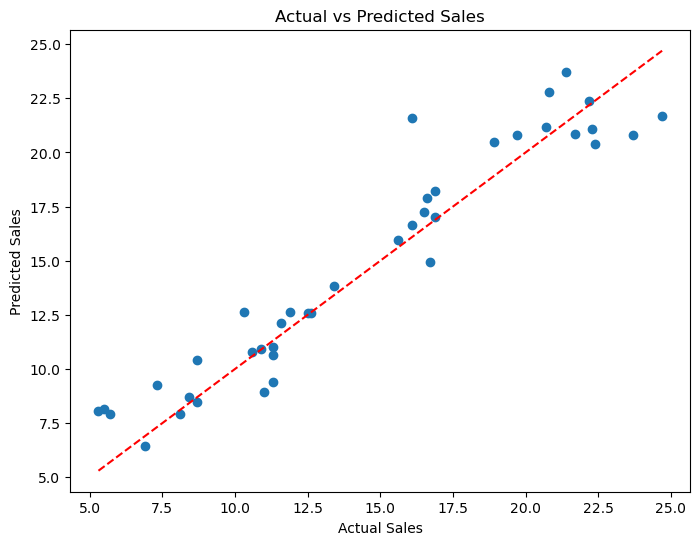

In [77]:
plt.figure(figsize = (8,6))
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red',
         linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rf_model= RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)

In [83]:
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)

In [85]:
print(f"MAE(RF):{mae_rf}")
print(f"MSE(RF):{mse_rf}")
print(f"R2(RF):{r2_rf}")

MAE(RF):0.9179999999999993
MSE(RF):1.4374328500000009
R2(RF):0.9534827934927883
